<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe8_OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de optimización.

**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen **claves ficticias $d_i$** que representan **búsquedas fallidas** con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Construir un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.


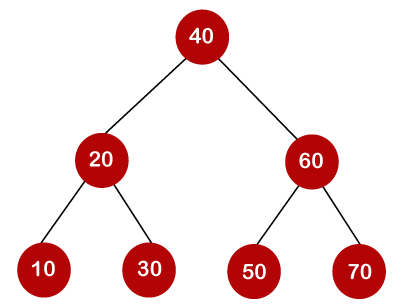

Tal como se había comentado en el informe anterior, un **problema de optimización** busca hallar el valor máximo dentro de una función a partir de una variable, esto con tal de resolver un problema de la manera más *óptima* posible.

Para un árbol binario de búsqueda, se conocen sus nodos y las probabilidades de cada nodo de que sean buscados. El costo de buscar un nodo es un factor muy importante en una ejecución eficiente del algoritmo, y es por esto que existe una manera de reducir el costo esperado de un árbol binario de búsqueda, lo cual se conoce como un **árbol binario de búsqueda óptimo**.

#2. Árbol binario de búsqueda óptimo 

##2.1 Método recursivo.

###2.1.1 Código

El siguiente código presenta una solución al problema del árbol binario de búsqueda óptimo, usando el **método recursivo**.

In [ ]:
import random
import numpy as np

contRecursiones = 0
verb = False

def costOptimo(freq, i , j, verbose):
  global contRecursiones

  #Caso base
  if j<i:  #No hay elementos dentro del subarreglo.
    if(verbose): 
      print(f"j = {j} menor a i = {i}, no existe subarreglo con el cual operar. Se retorna 0.") 
      print("")
    return 0
  if j == i: #Existen un único elemento en el subarreglo.
    if(verbose): 
      print(f"j igual a i = {i}, se retorna {freq[i]}") 
      print("")
    return freq[i]
  
  #Obtener la suma de freq[i], freq[i+1], ... , hasta freq[j].
  sumat = sum(freq,i,j)
  if(verbose): 
    print(f"Sumatoria de probabilidades freq[i...j] es {sumat}") 
    print("")

  #Inicializar valor mínimo.
  min = 9999999.

  #Uno por uno se consideran los elementos como raíz y se halla
  #recursivamente el costo del ABO, luego se comparan los valores del costo
  #hallado con min, actualizándose este último si se ve necesario.
  for r in range(i, j+1):
    if(verbose): print(f"r = {r}") 
    if(verbose): 
      print(f"Se realizan particiones a partir de r: freq[{i}...{r-1}] y freq[{r+1}...{j}]") 
      print("")
    contRecursiones += 2
    cost = (costOptimo(freq, i, r-1,verbose) + costOptimo(freq, r + 1, j,verbose))
    if(verbose): print(f"Costo conseguido es {cost}!") 

    if cost < min:
      if(verbose): print(""); print(f"costo hallado menor que mínimo actual, el mínimo ahora será {cost}") 
      min = cost
    
    #Se retorna el valor mínimo.
    if(verbose): 
      print(f"Se retorna {min} + {sumat} = {min + sumat}")
      print("")
    return min + sumat 

def optimalSearchTreeRec(keys, freq, n, verbose):
  #Se utiliza optCost para hallar el costo del árbol binario óptimo.
  return costOptimo(freq, 0, n-1, verbose) 


#Función que obtiene la suma de los elementos del arreglo freq[i] hasta freq[j]
def sum(freq, i, j):
  s = 0
  for k in range(i, j + 1):
    s += freq[k]
  return s

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

#Ejemplo
n = 10    
keys, p, q = optimal_bst_instance_generator(n)
costoBST = optimalSearchTreeRec(keys, p, n, verb)

print(f"Claves a buscar: {keys}")
print(f"Probabilidad de cada clave: {p}")
print(f"Probabilidad de claves ficticias: {q}")
print("")
print(f"El costo del árbol binario de búsqueda óptimo es {costoBST}")
print(f"Llamadas recursivas realizadas: {contRecursiones}")


Claves a buscar: [7, 16, 22, 24, 26, 29, 36, 41, 48, 81]
Probabilidad de cada clave: [0.06689832740830462, 0.07996473347949104, 0.05877625137176306, 0.09043211240983946, 0.005690507559969461, 0.029563994050430836, 0.06557666042568226, 0.03750598878425222, 0.05378189532489905, 0.0472985468602126]
Probabilidad de claves ficticias: [0.0096192  0.06919601 0.02991599 0.04433434 0.00335816 0.0874337
 0.09022219 0.03732903 0.01854439 0.06247121 0.01208676]

El costo del árbol binario de búsqueda óptimo es 2.6868285600043773
Llamadas recursivas realizadas: 18


###2.1.2 Descripción del algoritmo.

El algoritmo recibe como entrada un valor $n$ que será el número de claves a buscar, un arreglo ordenado de $n$ claves $K = <k_1, k_2,...,k_n>$ y otro arreglo de $n$ elementos $p = <p_1, p_2, ...,p_n>$, con la probabilidad de cada clave de ser buscada.

1. Se retorna el valor conseguido al llamar a la función `costOptimo(freq, 0, n-1)`, con `freq` nuestro arreglo de probabilidades por clave, `0` como nuestra posición `i` y `n-1` como `j`.

2. Si `j` es menor a `i`, entonces no hay elementos con los cuales trabajar en el subarreglo, por lo que se retorna `0`. Alternativamente, si `j` es igual a `i`, entonces existe un único elemento en el subarreglo, y por ende se retorna.

3. Por cada llamada recursiva, se consigue la sumatoria de probabilidades desde `freq[i]` hasta `freq[j]` con la función `sum`, y se almacena en una variable `sumat`.

4. Se inicializa la variable `min` con un número infinitamente grande como valor inicial. Luego, para cada valor de `r` entre `i` y `j`, el valor de `cost` será la suma entre los resultados de `optCost(freq, i, r - 1)` y `optCost(freq, r + 1, j)`.
Después, si `cost` es menor que `min`, se actualiza el valor de este último al del primero.

5. Finalmente, se retorna el valor final de `min` conseguido mas el valor de `sumat`.

$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es True, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

Cuando la variable `visualize` es True, se muestra por pantalla el árbol óptimo encontrado a partir del costo óptimo.

###2.1.3 Ejemplo

Considere una secuencia de $n=3$ claves.

$keys = [10, 12, 20]$

Cuya tabla de probabilidades por clave es la siguiente:

$p = [34, 8, 50]$

Lo primero que debemos hacer es sumar todas las probabilidades desde `i = 0` hasta `j = n-1 = 2` y lo almacenamos en una variable. De esta forma:

$sumatoria = 34 + 8 + 50 = 92$

Luego, tendremos una variable $min = 9999999$ como valor mínimo inicial para el problema.
Después, tendremos que para cada valor de `r` entre `i` y `j`, el costo será la suma entre lo que retorna la función $costOptimo$ con cada partición realizada a partir de `r`

$r = 0$


$cost = costOptimo(freq,i,r-1) + costOptimo(freq,r+1,j)$.

Para la primera llamada a la función en la suma, al ver que nuestro `j = r-1 = -1` es menor que `i = 0`, no existe un subarreglo con el cual trabajar, por ende el valor que retorna es 0.
En cuanto a la segunda llamada, con `i = 1` y `j = 2`, repetimos el mismo proceso anteriormente descrito, consiguiendo la sumatoria de probabilidades entre los índices y obteniendo el costo con las llamadas a la función.

$sumatoria = 8 + 50 = 58$ ;
$min = 9999999$

$r=1:$

$cost = costOptimo(freq,1,0) + costOptimo(freq,2,2)$.

Para el primer caso y debido a la lógica aplicada anteriormente, su valor es 0. En el segundo llamado, al ver que `i=j` para esta recursión, el subarreglo posee un único elemento, que es $freq[2] = 50$, y se retorna.
Se tiene así:

$cost = 0 + 50 = 50$.

Luego, comparamos el valor de $cost$ y de $min$ para ver quien es el menor, siendo el primero el que se lleva dicho título, y se actualiza $min$ a esta cifra.

$min = 50$

Se realiza este procedimiento con cada valor de `r` hasta llegar a `j`.

$r=2:$

$cost = costOptimo(freq,1,1) + costOptimo(freq,3,2)$.

$cost = 8 + 0 = 8$

$min(cost, min) = 8 --->  min = 8$

Al haber terminado con los valores de `r`, se retorna el último valor de $min$ mas el valor de sumatoria, es decir, $8 + 58 = 66$.
Volviendo al primer uso de la función, tenemos:

$r = 0:$

$cost = 0 + 66 = 66$.

$min(cost, min) = 66 --->  min = 66$

$r = 1:$

$cost = costOptimo(freq,0,0) + costOptimo(freq,2,2)

$cost = 34 + 50 = 84$

$min(cost, min) = 66 --->  min = 66$

$r=2:$

$cost = costOptimo(freq,0,1) + costOptimo(freq,3,2)$

Desarrollamos el primer llamado a la función $costOptimo$ en la suma:

$sumatoria = 34 + 8 = 42$ ;
$min = 9999999$

$r = 0 :$

$cost = costOptimo(freq,0,-1) + costOptimo(freq,1,1)$

$cost = 0 + 8 = 8$

$min(cost, min) = 8 --->  min = 8$

$r = 1 :$

$cost = costOptimo(freq,0,0) + costOptimo(freq,2,1)$

$cost = 34 + 0 = 34$

$min(cost, min) = 8 --->  min = 8$

Se retorna $8 + 42 = 50$.

Volviendo a al problema anterior, tenemos:

$cost = 50 + 0 = 50$.

$min(cost, min) = 50 --->  min = 50$

Se retorna $50 + 92 = 142$.

Tenemos finalmente, el costo del árbol binario de búsqueda óptimo para nuestro caso.


###2.1.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará un listado de 5 claves a buscar, cuyo listado de probabilidades es generada al azar.

In [ ]:
#Ejemplo
verb = True
n = 5    
keys, p, q = optimal_bst_instance_generator(n)

print(f"Claves a buscar: {keys}")
print(f"Probabilidad de cada clave: {p}")
print(f"Probabilidad de claves ficticias: {q}")
print("")

costoBST = optimalSearchTreeRec(keys, p, n, verb)

print(f"El costo del árbol binario de búsqueda óptimo es {costoBST}")

Claves a buscar: [3, 12, 38, 65, 96]
Probabilidad de cada clave: [0.1251458837781525, 0.0972771399239643, 0.09328437281985819, 0.13661028572742007, 0.12783763596532094]
Probabilidad de claves ficticias: [0.04820214 0.09188114 0.13480159 0.02631015 0.08466302 0.03398663]

Sumatoria de probabilidades freq[i...j] es 0.580155318214716

r = 0
Se realizan particiones a partir de r: freq[0...-1] y freq[1...4]

j = -1 menor a i = 0, no existe subarreglo con el cual operar. Se retorna 0.

Sumatoria de probabilidades freq[i...j] es 0.4550094344365635

r = 1
Se realizan particiones a partir de r: freq[1...0] y freq[2...4]

j = 0 menor a i = 1, no existe subarreglo con el cual operar. Se retorna 0.

Sumatoria de probabilidades freq[i...j] es 0.3577322945125992

r = 2
Se realizan particiones a partir de r: freq[2...1] y freq[3...4]

j = 1 menor a i = 2, no existe subarreglo con el cual operar. Se retorna 0.

Sumatoria de probabilidades freq[i...j] es 0.264447921692741

r = 3
Se realizan particiones

##2.2 Programación dinámica (acercamiento Bottom-Up)

###2.2.1 Código

El siguiente código presenta una solución al problema del árbol binario de búsqueda óptimo, usando el **acercamiento Bottom-Up**. 

In [14]:
import random
import numpy as np

#Conteo de subproblemas solucionados.
contSub = 0 
verb = False

#Número máximo con propósito de comparaciones.
max = 2147483647
 
def optimalSearchTreeBottomUp(keys, freq, n, verbose):
    global contSub
 
    #Se crea una matriz auxiliar n x n para guardar los resultados de los subproblemas.
    cost = [[0 for x in range(n)]
               for y in range(n)]

    #cost[i][j] será el costo óptimo del árbol binario de búsqueda que se puede formar con
    #keys[i] hasta keys[j]. cost[0][n-1] será nuestro costo óptimo resultante. 
 
    # Para cada clave, su costo será su probabilidad de ser buscada.
    for i in range(n):
        cost[i][i] = freq[i]
    
    if(verbose):
      print("Se crea una matriz para almacenar costes de los subproblemas.")
      for i in cost:
        print(i)
      print("Se inicializan las posiciones i = j como las probabilidades de cada clave.")
      print("")
 
    # Se consideran las cadenas de la matriz de largo 2, 3, ... . 
    # L será nuestro largo de la cadena.
    if(verbose): print("Se inicia ciclo por cada cadena de la matriz.")
    for L in range(2, n + 1):
        # i es el número de fila.
        if(verbose): 
          print("")
          print(f"L = {L}")
        for i in range(n - L + 2):
             
            #Se obtiene el número de columna j con los valores de i y L.
            j = i + L - 1
            if(verbose): print(f"i = {i}, j = {j}")
            if i >= n or j >= n:
                if(verbose): print("i o j mayor o igual a n, no existe subproblema trabajable.")
                break
            sumaFreq = sum(freq, i, j)
            if(verbose): print(f"La sumatoria de probabilidades desde {i} a {j} es {sumaFreq}")    
            cost[i][j] = max #Se inicializa la posición con valor temporal.
            if(verbose): 
              print(f"Subproblema cost[{i}][{j}] toma valor mínimo temporal {max}")
              print("")

            if(verbose): print("Inicia ciclo por cada valor de r") 
            # Se usan las claves dentro del rango keys[i...j] como raíces.
            for r in range(i, j + 1):
                if(verbose): 
                  print(f"r = {r}")  
                  print("")               
                # c es el costo del árbol cuando keys[r] es raíz.
                # del subárbol.
                c = 0
                if (r > i):
                    c += cost[i][r - 1]
                if (r < j):
                    c += cost[r + 1][j]
                c += sumaFreq
                if(verbose): print(f"La suma de coste obtenida es {c}")
                if (c < cost[i][j]):
                    if(verbose): print(f"Suma es menor que el costo en la posición [{i}][{j}], se actualiza nuevo valor mínimo")
                    cost[i][j] = c
                    if(verbose):
                      print("")
                      for k in cost:
                        print(k)
                      print("")
            contSub += 1
    if(verbose): print(f"Se retorna cost[0][{n-1}] = {cost[0][n-1]}")
    return cost[0][n - 1] #Se retorna el costo resultante.
 
 
#Función que obtiene la suma de los elementos del arreglo freq[i] hasta freq[j].
def sum(freq, i, j):
 
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
n = 10    
keys, p, q = optimal_bst_instance_generator(n)
costoBST = optimalSearchTreeBottomUp(keys, p, n, verb)

print(f"Claves a buscar: {keys}")
print(f"Probabilidad de cada clave: {p}")
print(f"Probabilidad de claves ficticias: {q}")
print("")
print(f"El costo del árbol binario de búsqueda óptimo es {costoBST}")
print(f"Subproblemas que resuelve el algoritmo: {contSub}")

Claves a buscar: [42, 47, 60, 64, 66, 84, 86, 91, 92, 98]
Probabilidad de cada clave: [0.05440110439917055, 0.06692804435758525, 0.043534445308439904, 0.027065810563565683, 0.028545186258444297, 0.06269024867823325, 0.06153932117921935, 0.04228609096114957, 0.04596969437104427, 0.037242200229725984]
Probabilidad de claves ficticias: [0.06084162 0.0668745  0.04638675 0.03082569 0.06352052 0.01684416
 0.06521235 0.05770149 0.02751592 0.03355358 0.06052129]

El costo del árbol binario de búsqueda óptimo es 1.285333638041143
Subproblemas que resuelve el algoritmo: 45


###2.2.2 Descripción del problema

**Subestructrura óptima**

Similar a la implementación recursiva de este algoritmo, se recibe un valor $n$ que será el número de claves a buscar, un arreglo ordenado de $n$ claves $K = <k_1, k_2,...,k_n>$ y otro arreglo de $n$ elementos $p = <p_1, p_2, ...,p_n>$, con la probabilidad de cada clave de ser buscada. Como para este caso estamos trabajando bajo el paradigma de la *programación dinámica*, antes de explicar cómo funciona, debemos definir la subestructura óptima de nuestro problema.

Considerando $c_{i,j}^*$ como el coste del árbol mínimo para la secuencia de claves ordenadas $k_i,k_{i+1},…,k_j$, podemos obtener el coste mínimo $c_{1,n}^*$ de nuestra secuencia de claves en base al coste mínimo de una serie de subproblemas.
Cada uno de estos subproblemas consiste en seleccionar una clave $k_i$ como nuestro nodo raíz y obtener el coste mínimo basándose en el coste mínimo de los subproblemas que se forman.

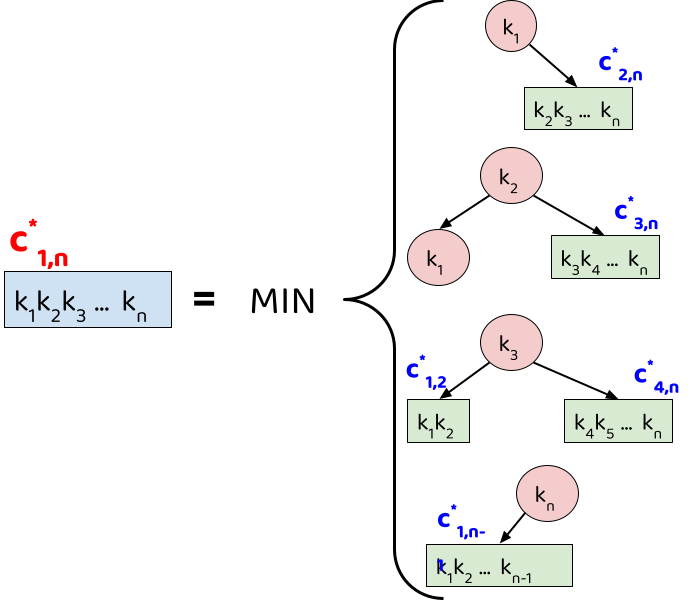

Consideremos un subproblema para la secuencia de claves $k_i k_{i+1} … k_{j-1}k_j$.

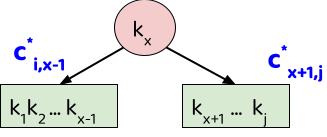

El coste del subárbol cuya raíz es $k_x$ es igual al coste mínimo de los subárboles más la probabilidad de visitar el nodo raíz, es decir, de clave $k_x$.

Esta probabilidad es equivalente a la probabilidad de buscar su clave más la probabilidad de buscar la de sus hijos: $\sum\limits_{k=i}^j p_j$.

Con esto en cuenta, decimos que el coste del árbol con raíz $k_x$ está dada por la ecuación:

$c_{i,j}(x)=c_{i,x-1}^* + c_{x+1,j}^* + \sum\limits_{k=1}^j p_j$

Cabe destacar que el **acercamiento Bottom-Up** almacena los subproblemas anteriores para utilizarlos con más facilidad para los casos siguientes, a diferencia de la implementación recursiva en donde un subproblema debía ser resuelto repetidas veces, lo cual conllevaba a que fuera un algoritmo ineficiente.

**Funcionamiento del algoritmo**

El algoritmo recibe como entrada un valor $n$ que será el número de claves a buscar, un arreglo ordenado de $n$ claves $K = <k_1, k_2,...,k_n>$ y otro arreglo de $n$ elementos $p = <p_1, p_2, ...,p_n>$, con la probabilidad de cada clave de ser buscada.

1. Se crea una matriz auxiliar `cost` de $n$ filas y $n$ columnas que almacenará los costes mínimos de cada subproblemas. Inicializamos cada posición diagonal $cost_{0,0}, cost_{1,1}, ... , cost_{n-1,n-1}$ con la probabilidad de cada clave de ser buscada.

2. Por cada valor de `L` desde 2 a `n` como largo de las cadenas de la matriz, se rellena cada diagonal superior, recorriendo cada posición de fila `i` desde 0 hasta `n - L + 2` y obteniendo el valor de la columna `j = i + L -1` para luego obtener la sumatoria de las probabilidades desde `i` hasta `j` con la función `sum`.

3. Se inicializa la posición `cost[i][j]` como un valor infinitamente grande. Luego, para cada valor de r entre i y j, el valor de cost será la suma entre la sumatoria de las probabilidades conseguidas y:

* Si `r > i`, se le suma el valor de `cost[i][r-1]`.

* Si `r < j`, se le suma el valor de `cost[r + 1][j]`.

Después, si esta suma es menor al costo previamente almacenado en `cost[i][j]`, se actualiza a su valor.

4. Terminado el ciclo contado desde el **paso 2**, se retorna el valor de `cost[0][n-1]`, que es donde se guardará el costo mínimo resultante.

$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es True, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

Cuando la variable `visualize` es True, se muestra por pantalla el árbol óptimo encontrado a partir del costo óptimo.


###2.2.3 Ejemplo

Considere una secuencia de $n=3$ claves.

$keys = [10, 12, 20]$

Cuya tabla de probabilidades por clave es la siguiente:

$p = [34, 8, 50]$

Primero, creamos una matriz `cost` de dimensiones `n x n`, en este caso `3 x 3`, que nos ayudará a almacenar los costes mínimos de cada subproblema resuelto. Iniciamos todas sus posiciones en 0 a excepción de la diagonal $cost_{0,0} , cost_{1,1} ... , cost_{n-1,n-1}$, la cual poseerá las probabilidades de cada clave de ser buscada.

$cost = \begin{equation}
\begin{pmatrix}
34 & 0 & 0\\
0 & 8 & 0\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Ahora, partimos con nuestro primer valor de `L` largo de matriz, el cual irá desde `2` hasta `n = 3`, y por cada caso iremos recorriendo las filas con el índice `i`, que irá desde `0` a `n - L + 2 = 3` y conseguimos el valor del índice de columnas `j` en cada caso.

$L = 2$

$--> i = 0$

$----> j = i + L - 1 = 1$

Ahora, como $i$ ni $j$ son mayores o iguales a $n$, se procede a obtener la suma de probabilidades desde `i` hasta `j` en el arreglo de probabilidades. Además, inicializamos el valor de la posición `cost[i][j]` como un valor marginalmente grande como un coste mínimo inicial.

$sumatoria = 34 + 8 = 42$

$cost[i][j] = 2147483647$

Ahora, por cada valor de `r` desde `i` hasta `j`, tendremos un valor `c` el cual tomará la suma entre `sumatoria` y:

* Si `r` es mayor a `i`, la posición `cost[i][r-1]`.

* Si `r` es menor a `j`, la posición `cost[r+1][j]`

Como actualmente `r` cumple sólo el segundo caso, se hace la suma pertinente.

$r = 0 :$

$c = sumatoria + cost[1][1] = 42 + 8 = 50$

Como el valor total de la suma es menor al ya encontrado en `cost[i][j] = cost[0][1]`, actualizamos la posición al nuevo valor mínimo.

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 0\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Realizamos el mismo procedimiento con el siguiente valor de `r`:

$r = 1; $
$r > i$

$c = sumatoria + cost[0][0] = 42 + 34 = 76$

$min(c,cost[0][1]) = cost[0][1] ; cost[0][1] = 50$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 0\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Una vez terminado con el ciclo de `r`, ya hemos encontrado el coste mínimo de este subproblema.
Ahora pasamos al siguiente valor de `i`.

$L = 2$

$--> i = 1$

$----> j = i + L - 1 = 2$

$sumatoria = 8 + 50 = 58$

$cost[i][j] = 2147483647$

Para cada `r` desde `i` hasta `j`:

$r = 1; $
$r < j$

$c = sumatoria + cost[2][2] = 58 + 50 = 108$

$min(c,cost[1][2]) = sumatoria ; cost[1][2] = 108$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 108\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

$r = 2; r > i$

$c = sumatoria + cost[1][1] = 58 + 8 = 66$

$min(c,cost[1][2]) = c; cost[1][2] = 66$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Para el siguiente valor `i = 2`, al ver que el cálculo de `j` nos daría `j = i + L - 1 = 3 = n`, el índice de las columnas se sale del rango de la matriz, por lo que no se puede trabajar con este subproblema y se omite. Lo mismo se puede decir para `i = 3 = n` donde `j = i + L - 1 = 4 > n`.

Realizamos este procedimiento para todo valor de `L` dentro de su rango:

$L = 3$

$--> i = 0$ (Desde 0 hasta n - L + 2 = 2)

$---> j = i + L - 1 = 2

$sumatoria = 34 + 8 + 50 = 92$

$cost[i][j] = 2147483647$

$r = 0; $
$r < j$

$c = sumatoria + cost[1][2] = 92 + 66 = 158$

$min(c,cost[0][2]) = c ; cost[0][2] = 158$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 158\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

$r = 1; $
$r < j; r > 1$

$c = sumatoria + cost[0][0] + cost[2][2] = 92 + 34 + 50 = 176$

$min(c,cost[0][2]) = cost[0][2] ; cost[0][2] = 158$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 158\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

$r = 2; $
$r > i$

$c = sumatoria + cost[0][1] = 92 + 50 = 142$

$min(c,cost[0][2]) = cost[0][2] ; cost[0][2] = 142$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 142\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Nuevamente, para los siguientes valores de `i` se obtendrá un valor para `j` mayor o igual a `n`, por lo que aquellos ciclos se descartan.

Ahora que hemos terminado con el ciclo de valores para `L`, retornamos el valor en la matriz ubicado en la posición `[0][n-1]`, es decir, retornamos `cost[0][2]` = 142.

Tenemos finalmente, el costo del árbol binario de búsqueda óptimo para nuestro caso.



### 2.2.4 Ejecución del programa paso a paso.
Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará un listado de 5 claves a buscar, cuyo listado de probabilidades es generada al azar.

In [15]:
#Ejemplo
verb = True
n = 5    
keys, p, q = optimal_bst_instance_generator(n)

print(f"Claves a buscar: {keys}")
print(f"Probabilidad de cada clave: {p}")
print(f"Probabilidad de claves ficticias: {q}")
print("")

costoBST = optimalSearchTreeBottomUp(keys, p, n, verb)

print(f"El costo del árbol binario de búsqueda óptimo es {costoBST}")

Claves a buscar: [6, 14, 35, 56, 68]
Probabilidad de cada clave: [0.15739500716788477, 0.1338406361934122, 0.10620810100613381, 0.09938617628066393, 0.00133464797803078]
Probabilidad de claves ficticias: [0.0703428  0.08808567 0.05904202 0.14705508 0.096504   0.04080586]

Se crea una matriz para almacenar costes de los subproblemas.
[0.15739500716788477, 0, 0, 0, 0]
[0, 0.1338406361934122, 0, 0, 0]
[0, 0, 0.10620810100613381, 0, 0]
[0, 0, 0, 0.09938617628066393, 0]
[0, 0, 0, 0, 0.00133464797803078]
Se inicializan las posiciones i = j como las probabilidades de cada clave.

Se inicia ciclo por cada cadena de la matriz.

L = 2
i = 0, j = 1
La sumatoria de probabilidades desde 0 a 1 es 0.2912356433612969
Subproblema cost[0][1] toma valor mínimo temporal 2147483647

Inicia ciclo por cada valor de r
r = 0

La suma de coste obtenida es 0.4250762795547091
Suma es menor que el costo en la posición [0][1], se actualiza nuevo valor mínimo

[0.15739500716788477, 0.4250762795547091, 0, 0, 0]
[0, 0

# Correctitud 

# Tiempo de ejecución.



##4.1 Teorema (Programación dinámica)

El algoritmo `optimalSearchTree` en su implementación Bottom-Up posee un tiempo de ejecución $O(n^3)$ **en el peor y mejor caso**.

##4.2 Prueba del teorema.

Al ver detenidamente nuestro código del punto `2.2.1`, tenemos un ciclo for con el valor `L` que es el largo de cada diagonal superior en la matriz. Dentro de este, existe otro ciclo for con el índice `i` que consigue un valor `j` para hallar una posición `[i][j]` de la matriz para la cual hallar un coste mínimo. Dentro de este ciclo, tenemos un ciclo for para los valores de `r` que se encarga de evaluar y asignar el coste mínimo a la posición previamente mencionada. Gracias a la estructura de este algoritmo, podemos concluir que su tiempo de ejecución es efectivamente $O(n^3)$.

La cantidad de subproblemas a resolver en función del tamaño del problema de entrada $n$ es dada por la ecuación: